# Investigation of Ford GoBike's trip data

## By Jasthi Naveen

### Investigation Overview

In this investigation, I wanted to look at the characteristics of various factors involved during trips. The main focus was on the geographical coordinates, duration, gender, bike models, hour of the day, day of the week, etc.

## Dataset Overview

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The data consists of around 239k records for the trips done in April 2019.

## Inspiration

* When are most trips taken in terms of time of day or day of the week?

* How long does the average trip take?

* Does the above depend on if a user is a subscriber or customer?

## Data Wrangling

### Gathering Data

In [34]:
# Import all necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [35]:
# Load data
df = pd.read_csv('201904-fordgobike-tripdata.csv')

## Cleaning Data

In [36]:
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)

In [37]:
# Modify Data types

df['start_station_id'] = df['start_station_id'].astype('int').astype('str')
df['end_station_id'] = df['end_station_id'].astype('float').astype('int').astype('str')
df['bike_id'] = df['bike_id'].astype('float').astype('int').astype('str')
df['member_birth_year'] = df['member_birth_year'].astype('float').astype('int')

In [38]:
# Format Date

df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [39]:
# Add 'duration' column

def minCount(dates):
    return (round((dates.seconds/60)))

def hourCount(dates):
    return (round((dates.seconds/60)/60, 2))

df['duration'] = df['end_time'] - df['start_time']

dates = df['duration'].abs()
dates = dates.map(minCount)
df['duration_min'] = dates

dates = df['duration'].abs()
dates = dates.map(hourCount)
df['duration_hour'] = dates

In [40]:
df['latitude_diff'] = df['start_station_latitude'] - df['end_station_latitude']

df['longitude_diff'] = df['start_station_longitude'] - df['end_station_longitude']

In [41]:
# Adding Month, Day and Hour of tweets and retweets

df['start_month'] = df['start_time'].dt.month_name()
df['start_day'] = df['start_time'].dt.day_name()
df['start_hour'] = df['start_time'].dt.hour


df['end_month'] = df['end_time'].dt.month_name()
df['end_day'] = df['end_time'].dt.day_name()
df['end_hour'] = df['end_time'].dt.hour

df['age'] = df['start_time'].dt.year - df['member_birth_year']

In [42]:
df = df[df['age']<100]
df = df[(df['latitude_diff']<1) & (df['latitude_diff']>-1)]

## Explanatory Data Analysis

In [49]:
base_color = sb.color_palette()[0]

## Standard plot for the no of trips based on the duration in hours

We want to have a overview of the time duration which is taken for any random trip taking place.

## Observation

* After plotting the graph on a logarithmic scale, we can see that the graph is similar to normal curve.

* We can see that the peak is at the point slightly less than 0.2 and the graph is more like the normal curve but is skewed slightly to the right

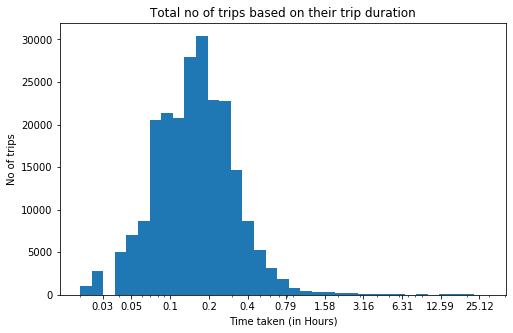

In [50]:
binsize = .1
log_binsize = 0.09
bins = 10 ** np.arange(-1.7, np.log10(df['duration_hour'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_hour', bins = bins)

plt.xscale('log')
bins = np.around(10 ** np.arange(-1.6, 1.5, .3), 2)
plt.xticks(bins, bins)
plt.xlabel('Time taken (in Hours)')
plt.ylabel('No of trips')
plt.title('Total no of trips based on their trip duration');
plt.show()

## Lets see the most common start stations

Most popular station will help us in knowing the station from where most of the trips are started

## Observation

We can see the top 10 names of the stations having most no of trips starting from. In the list San Francisco Caltrain Station 2  (Townsend St at 4th St) is at the top which means that it's the most popular start station

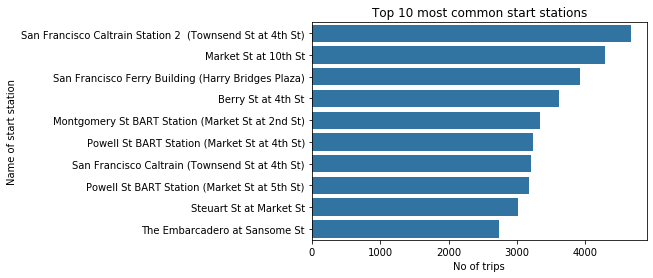

In [52]:
neighbourhood_counts = df['start_station_name'].value_counts()
neighbourhood_order = neighbourhood_counts.index
sb.countplot(data = df, y = 'start_station_name', order = neighbourhood_order[:10], color=base_color)
plt.xlabel('No of trips')
plt.ylabel('Name of start station')
plt.title('Top 10 most common start stations');


## Lets see the most common end stations

Most popular station will help us in knowing the station to where most of the trips are ended

## Observation

We can see the top 10 names of the stations having most no of trips ending at. In the list San Francisco Caltrain Station 2  (Townsend St at 4th St) is at the top which means that it's the most popular end station

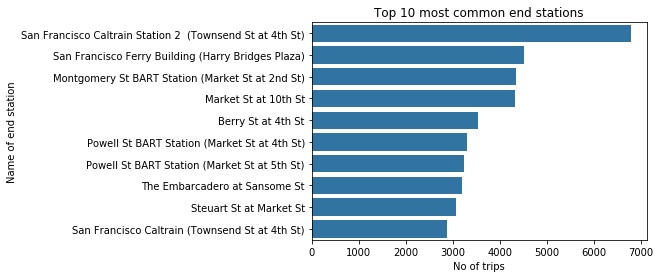

In [53]:

neighbourhood_counts = df['end_station_name'].value_counts()
neighbourhood_order = neighbourhood_counts.index
sb.countplot(data = df, y = 'end_station_name', order = neighbourhood_order[:10], color=base_color)
plt.xlabel('No of trips')
plt.ylabel('Name of end station')
plt.title('Top 10 most common end stations');

From the last few graphs, we can see that San Francisco Caltrain Station 2  (Townsend St at 4th St) is the most popular start station as well as end station.

### Lets see the distribution of gender for all the people who participated in the trips

Gender equlity is often considered as one of the most important factor in the upliftment in the society. Lets see if that is followed here or not.

## Observation
We can see that males dominate the distribution. More than half of the rides are done by males.

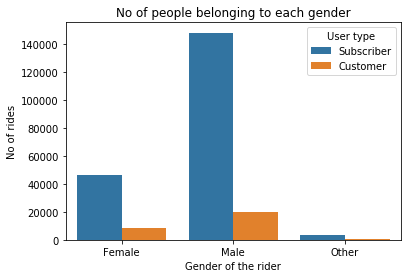

In [54]:
sb.countplot(data=df, x='member_gender', hue='user_type');
plt.xlabel('Gender of the rider')
plt.ylabel('No of rides')
plt.title('No of people belonging to each gender')
plt.legend(title='User type');

## Lets see what's the age for the people who mostly participate in the trips

Age is an important factor as old people should not be involved in raod trips due to health problems.

## Ovservation

We can see that people near the age of 30 are mostly invloved in the road trips and the distribution is highly skewed towards right. Also we can see that there are hardly any person going for a ride after the age of 75.

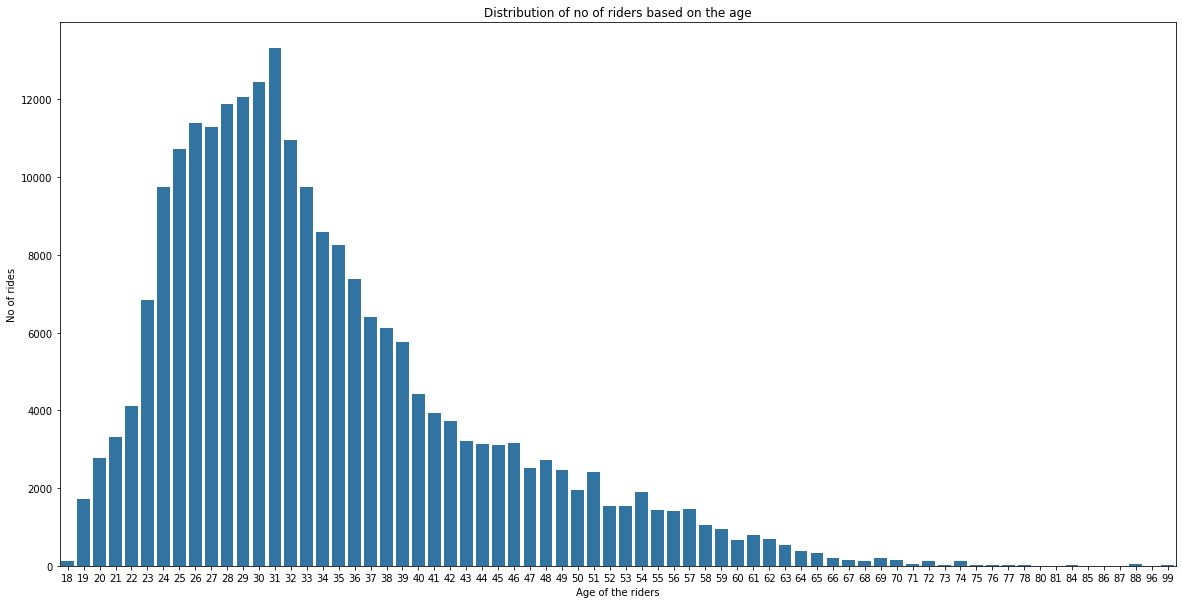

In [55]:
plt.figure(figsize=(20,10))
bin_size = np.arange(0, 100, 5)
sb.countplot(data = df , x = 'age', color = base_color)
plt.xlabel('Age of the riders')
plt.ylabel('No of rides')
plt.title('Distribution of no of riders based on the age');

## Lets see the variation based on the day of the week.

We can find out if there is any particular favourite for starting the trips or they are at random.

## Observation

The graph shows that most of the rides were started on Tuesday and the least on Saturday

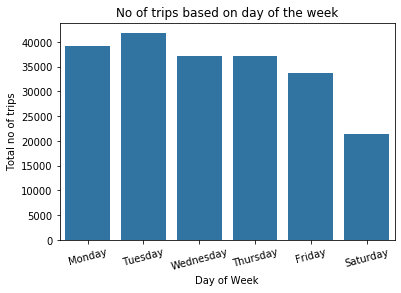

In [56]:
x_marker = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday']
sb.countplot(data=df, x='start_day', order=x_marker, color=base_color);
plt.title('No of trips based on day of the week')
plt.xlabel('Day of Week')
plt.xticks(rotation=15)
plt.ylabel('Total no of trips');

## Lets have a look at the starting time of the trips¶

We can find out if people tend to travel round the clock or they prefer some special time of the day

## Observation

The above graph shows that most of the trips are done either in the morning or in the evening. There is slightly less no of trips taken during the afternoon. There is almost no trips started before 5. The graph obtained is a bimodal graph with first peak at 8AM and second peak at 5PM

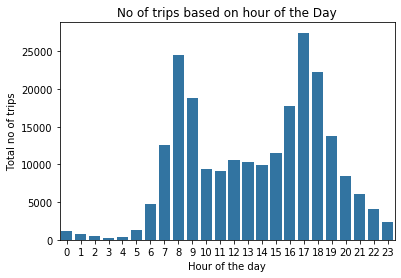

In [57]:
df.groupby('start_hour').count()
sb.countplot(data=df, x='start_hour', color=base_color);
plt.xlabel('Hour of the day')
plt.ylabel('Total no of trips')
plt.title('No of trips based on hour of the Day');

## Lets have a look at the most popular bike models which were used for the trips.

Most popular bike models can be useful for choosing a new bike for a ride

## Observation

We can see that the bike having bike-id as 3750 is having the most no of rides.

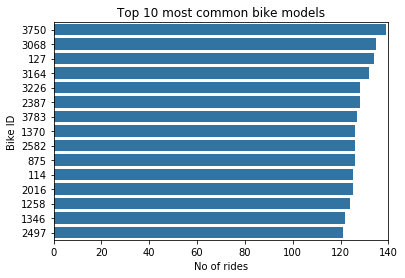

In [58]:
neighbourhood_counts = df['bike_id'].value_counts()
neighbourhood_order = neighbourhood_counts.index
plt.xlim(0,df['bike_id'].value_counts().max() + 1)
sb.countplot(data = df, y = 'bike_id', order = neighbourhood_order[0:15], color=base_color)
plt.xlabel('No of rides')
plt.ylabel('Bike ID')
plt.title('Top 10 most common bike models');

## Lets see the average duration of the road trip as travelled by people of different age group

As we know that older people are less likely to have rides, its interesting to find the average duration of their rides

## Observation
We can see that the highest duration of trips is for the age groups around 80. Also the initial graph which starts at the age of around 20 has some good amount of average duration for the trips

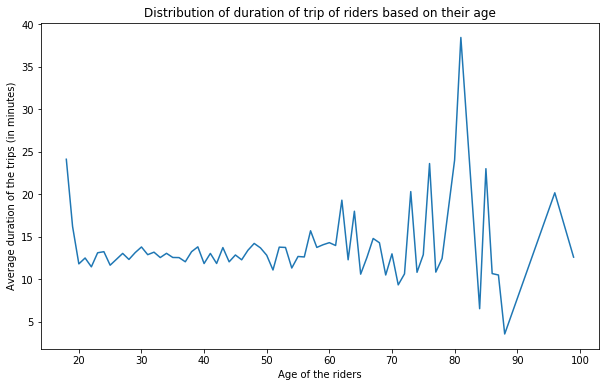

In [59]:

plt.figure(figsize=(10,6))
sb.lineplot(data=df[df['age']<100], x='age', y='duration_min', err_style=None)
plt.xlabel('Age of the riders')
plt.ylabel('Average duration of the trips (in minutes)')
plt.title('Distribution of duration of trip of riders based on their age');

## Lets see the difference between latitudes and longitudes using jointplots.

We can see if there are common travelling destinations or there is some specific ones also

## Observation

Most of the trips are having continuous differences. There are few points outside the inner sphere. These indicate that they are some special destinations which have been visited by very few people

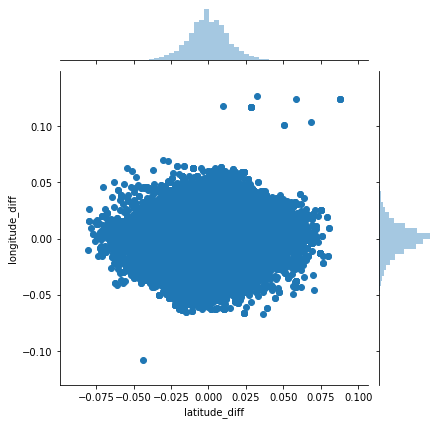

In [60]:
sb.jointplot(data=df, x='latitude_diff', y='longitude_diff');


## Is difference in latitude and longitude gender biased

We can find out of some particular gender os more likely to have some lower limit or some higher limit

## Observation

* We can see that for the difference in latitude, there is no such difference and all the three looks almost the same.

* For the difference in longitude, we can see that Males are more likely to have larger differences with respect to longitude

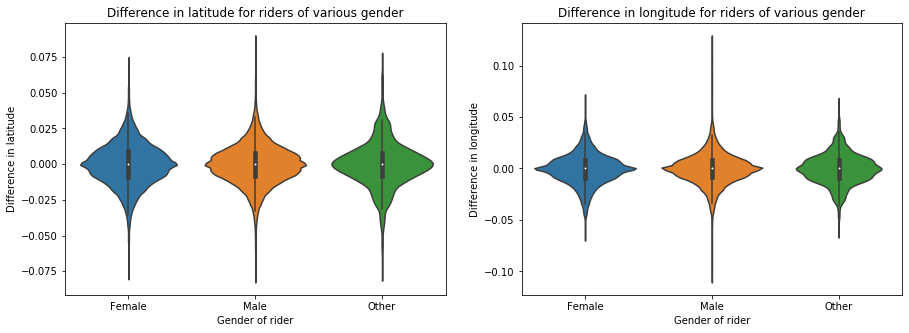

In [61]:
plt.figure(figsize = [15, 5])

plt.subplot(1,2,1)

sb.violinplot(data=df, x='member_gender', y = 'latitude_diff')
plt.xlabel('Gender of rider')
plt.ylabel('Difference in latitude')
plt.title('Difference in latitude for riders of various gender');

plt.subplot(1,2,2)

sb.violinplot(data=df, x='member_gender', y = 'longitude_diff')
plt.xlabel('Gender of rider')
plt.ylabel('Difference in longitude')
plt.title('Difference in longitude for riders of various gender');


## Lets see the difference between latitudes and longitudes using jointplots.
We can see if there are common travelling destinations or there is some specific ones also

## Observation
Most of the trips are having continuous differences. There are few points outside the inner sphere. These indicate that they are some special destinations which have been visited by very few people

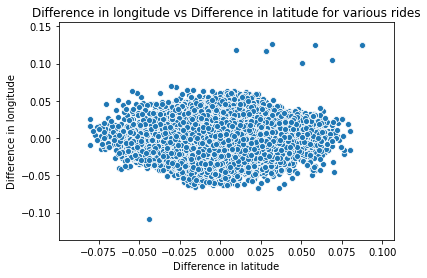

In [62]:
sb.scatterplot(data = df, x='latitude_diff', y='longitude_diff')
plt.xlabel('Difference in latitude')
plt.ylabel('Difference in longitude')
plt.title('Difference in longitude vs Difference in latitude for various rides');

## Is the duration of trip gender biased
We have already seen that the average duration of the road trip as travelled by people of different age group is highly dependent on the age group as we know that older people are less likely to have rides. Here we have chance to see that is there any relationship between the duration of the trip and the gender of the rider

## Observation
We can see that Most of the trips with longer duration have been done by Males. This is least for the rider with gender as Other.

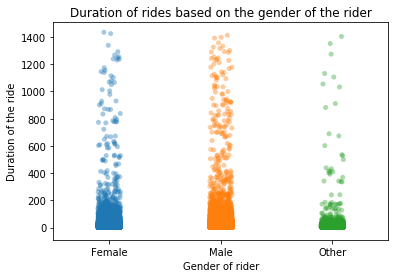

In [63]:
sb.stripplot(data = df, x = 'member_gender', y = 'duration_min', alpha = 0.4)
plt.xlabel('Gender of rider')
plt.ylabel('Duration of the ride')
plt.title('Duration of rides based on the gender of the rider');

In [64]:

numeric_vars = ['duration_sec', 'start_station_latitude', 'start_station_longitude', 'end_station_latitude',
                'end_station_longitude', 'start_hour', 'age']
categoric_vars = ['user_type', 'member_gender', 'bike_share_for_all_trip']

## We can finally combine the results we have to get comparative analysis
* We can use plots between start day and user type for getting the first observation
* We can use plots between start day and gender of rider for getting the second observation
* We can use plots between start day and bike share for all trip for getting the third observation
## Observation
We can see that there is gradual decrease in the number of riders as the days of the week pass. We can also notice that Tuesday is the day having the highest number of riders for all the categories.

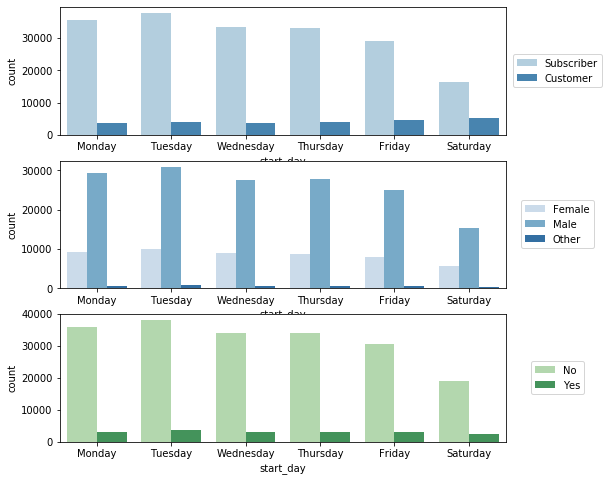

In [65]:
plt.figure(figsize = [8, 8])
x_marker = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday']

# subplot 1: start_day vs user_type
ax = plt.subplot(3, 1, 1)
sb.countplot(data = df, x = 'start_day', hue = 'user_type', palette = 'Blues', order = x_marker)
ax.legend(loc='center', bbox_to_anchor=(1.115, 0.5))

# subplot 2: start_day vs. member_gender
ax = plt.subplot(3, 1, 2)
sb.countplot(data = df, x = 'start_day', hue = 'member_gender', palette = 'Blues', order = x_marker)
ax.legend(loc='center', bbox_to_anchor=(1.115, 0.5)) 

# subplot 3: start_day vs. bike_share_for_all_trip
ax = plt.subplot(3, 1, 3)
sb.countplot(data = df, x = 'start_day', hue = 'bike_share_for_all_trip', palette = 'Greens', order = x_marker)
ax.legend(loc='center', bbox_to_anchor=(1.115, 0.5)) 

plt.show()